In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
loan_data = pd.read_csv(r'C:\Users\akash\Desktop\logitic\Data_Set\loan_dataset_100.csv')
print(loan_data.tail())
print("\nDataset Info:")
print(loan_data.info())
loan_data.isnull().sum()
loan_data.describe()

    Loan_ID  Gender Married     Education  ApplicantIncome  LoanAmount  \
95       96    Male     Yes  Not Graduate            79192      112954   
96       97  Female     Yes      Graduate            63784      292637   
97       98  Female      No  Not Graduate            41477      320601   
98       99    Male     Yes  Not Graduate            78136      323963   
99      100  Female      No      Graduate            61914      269379   

    Credit_History Loan_Status  
95               0    Rejected  
96               0    Rejected  
97               0    Rejected  
98               1    Approved  
99               0    Rejected  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Loan_ID          100 non-null    int64 
 1   Gender           100 non-null    object
 2   Married          100 non-null    object
 3   Education

,Loan_ID,ApplicantIncome,LoanAmount,Credit_History
count,100.000000,100.000000,100.00000,100.000000
mean,50.500000,51957.410000,250693.50000,0.460000
std,29.011492,18010.183553,81241.44091,0.500908
min,1.000000,20088.000000,104856.00000,0.000000
25%,25.750000,36281.250000,189570.75000,0.000000
50%,50.500000,51597.500000,250782.00000,0.000000
75%,75.250000,67911.250000,321441.50000,1.000000
max,100.000000,79562.000000,396844.00000,1.000000


In [7]:
loan_data['Gender'] = loan_data['Gender'].map({'Male': 1, 'Female': 0})
loan_data['Married'] = loan_data['Married'].map({'Yes': 1, 'No': 0})
loan_data['Education'] = loan_data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'Approved': 1, 'Rejected': 0})

In [8]:
loan_data.head()

,Loan_ID,Gender,Married,Education,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,1,1,0,0,20088,324167,1,0
1,2,1,1,1,29685,310836,1,0
2,3,1,1,1,32751,142773,0,0
3,4,0,0,1,28997,118216,0,0
4,5,0,0,0,23929,231446,1,0


In [4]:
x = loan_data[['ApplicantIncome','LoanAmount','Credit_History']]
y = loan_data['Loan_Status']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [15]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8
              precision    recall  f1-score   support

    Approved       0.56      1.00      0.71         5
    Rejected       1.00      0.73      0.85        15

    accuracy                           0.80        20
   macro avg       0.78      0.87      0.78        20
weighted avg       0.89      0.80      0.81        20



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 

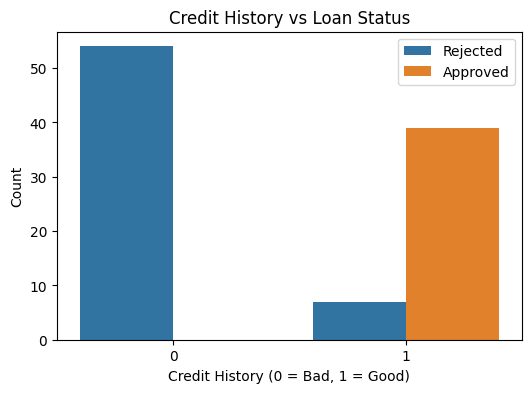

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan_data)
plt.title("Credit History vs Loan Status")
plt.xlabel("Credit History (0 = Bad, 1 = Good)")
plt.ylabel("Count")
plt.legend(["Rejected", "Approved"])
plt.show()

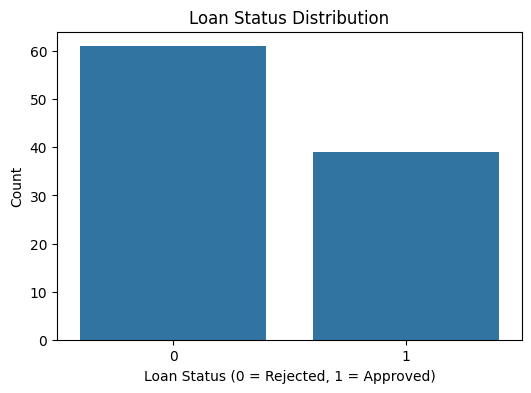

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=loan_data)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Count")
plt.show()

In [23]:
import joblib

joblib.dump(model, "loan_approval_model.pkl")
print("Model save as loan_approval_model.pkl")

Model save as loan_approval_model.pkl
